<a href="https://colab.research.google.com/github/matsha2266/DATA201/blob/main/Project_1_Data_201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. INTRODUCTION

For this first project our team decided to work on a data set called Employee Salaries - 2022. The data set source is from the dataMontgomery portal which seeks to provide open access to the County's data as outlined by the MD Public Information Act(MPIA). The data set is about annual salary information  of 10100 observations and 8 variables including gross pay and overtime pay for all active, permanent employees of Montgomery County, MD paid in calendar year 2022. This information will be published annually each year. Going through the data set here are the following questions we would like to explore:
1) Is there a relationship between base salary and over time pay?
2) Is there a relationship between base salary and gender?
3) Is there a relationship between Overtime pay and gender?
4) Which Departments have a higher base salary?
5) Which Departments have more overtime pay?


### Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import numpy as np
import os

### Loading data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sal=pd.read_csv('/content/drive/MyDrive/Project 1 Data 201/Employee_salaries.csv')

In [ ]:
#sal=pd.read_csv('/Files/Employee_salaries.csv')
os.listdir

<function posix.listdir(path=None)>

# II. Wrangling and Exploratory Data Analysis

> Add blockquote



In [ ]:
print(sal.head())

  Department                               Department_Name  \
0        ZAH  Office of Zoning and Administrative Hearings   
1        ZAH  Office of Zoning and Administrative Hearings   
2        ZAH  Office of Zoning and Administrative Hearings   
3        ZAH  Office of Zoning and Administrative Hearings   
4        ZAH  Office of Zoning and Administrative Hearings   

                                            Division Gender  Base Salary  \
0          ZAH 05 Zoning and Administrative Hearings      M     $142,100   
1          ZAH 05 Zoning and Administrative Hearings      F     $162,000   
2          ZAH 05 Zoning and Administrative Hearings      F      $93,895   
3  ZAH 05 Office of Zoning and Administrative Hea...      F   $77,179.61   
4                                    ZAH 05 Director      F  $196,631.58   

  Overtime Pay Longevity Pay Grade  
0          NaN           NaN   N35  
1          NaN           NaN   N35  
2          NaN           NaN   N21  
3          NaN        

In [ ]:
sal.info() #8 variables, Overtime pay and longevity pay have a significant amount of nas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10052 entries, 0 to 10051
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Department       10052 non-null  object
 1   Department_Name  10052 non-null  object
 2   Division         10052 non-null  object
 3   Gender           10052 non-null  object
 4   Base Salary      10052 non-null  object
 5   Overtime Pay     5786 non-null   object
 6   Longevity Pay    2399 non-null   object
 7   Grade            10013 non-null  object
dtypes: object(8)
memory usage: 628.4+ KB


In [ ]:
sal.isnull().sum() #amount of nas

,0
Department,0
Department_Name,0
Division,0
Gender,0
Base Salary,0
Overtime Pay,4266
Longevity Pay,7653
Grade,39


## Cleaning Dataset and changing class of variables

In [ ]:
sal = sal.dropna(subset=['Overtime Pay'])

In [ ]:
sal["Base Salary"] = (
    sal["Base Salary"]
    .str.replace("$", "")
    .str.replace(",", "")
    .astype(float))


In [ ]:
sal["Overtime Pay"] = (
    sal["Overtime Pay"]
    .str.replace("$", "")
    .str.replace(",", "")
    .astype(float))

In [ ]:
sal["Longevity Pay"] = (
    sal["Longevity Pay"]
    .str.replace("$", "")
    .str.replace(",", "")
    .astype(float))

In [ ]:
sal.describe() #descriptive statistics for numeric variables

,Base Salary,Overtime Pay,Longevity Pay
count,5786.000000,5786.000000,1458.000000
mean,80517.784677,12745.667478,2777.599650
std,22379.989127,17515.354262,1386.232303
min,18853.500000,1.020000,59.120000
25%,64041.682500,1306.832500,1718.280000
50%,78181.625000,6609.040000,2661.520000
75%,97489.000000,16977.855000,3612.992500
max,201000.000000,204404.490000,7880.960000


In [ ]:
sal[['Department','Department_Name','Division','Gender','Grade']].describe() #descriptive statistics for categorical variables

,Department,Department_Name,Division,Gender,Grade
count,5786,5786,5786,5786,5786
unique,27,27,394,2,76
top,POL,Department of Police,DOT 50 Transit Gaithersburg Ride On,M,T1
freq,1395,1395,351,4159,678


# IV. Visualizing 4 Variables: Department Name, Gender, Base Salary, and Overtime Pay

## Is there a relationship between base salary and overtime pay?

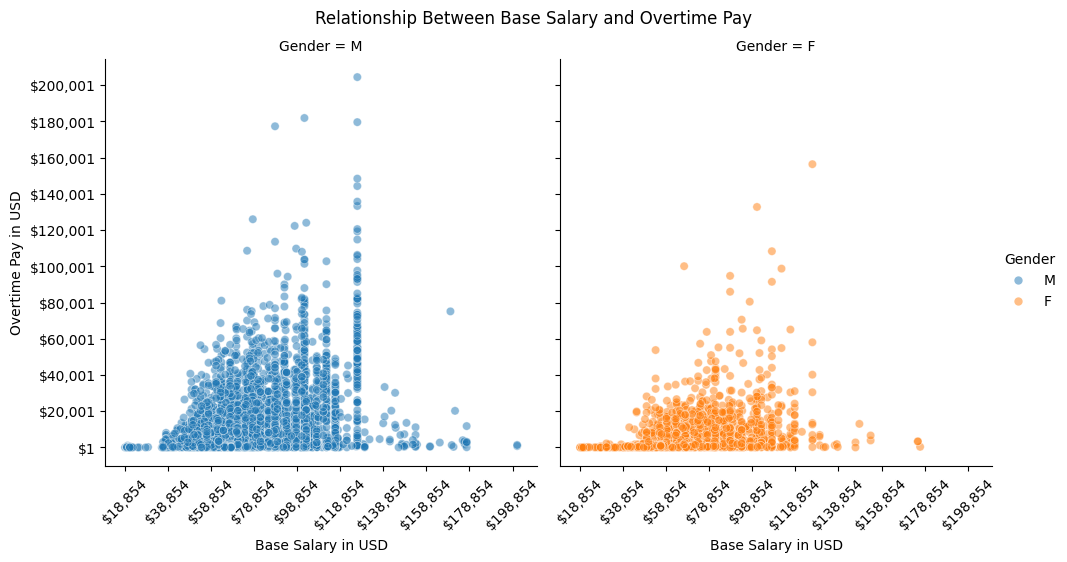

In [ ]:
pl = sns.relplot(x='Base Salary',
            y='Overtime Pay',
            data=sal,
            kind='scatter',
            col = "Gender",
            hue = "Gender",
            alpha = 0.5)

# naming
pl.fig.suptitle("Relationship Between Base Salary and Overtime Pay", y = 1.03)
pl.set(xlabel = "Base Salary in USD", ylabel = "Overtime Pay in USD")

# formatting the x and y ticks beacuse it got too overcrowded. Also, since the tick values have been converted to floats, I will modfiy them to include $ and , for better readbility
from matplotlib.ticker import StrMethodFormatter

x_ticks = np.arange(18853.5, 201000.0, 20000)  # Ticks every 20000 units from 18853.5 to 201000.0
y_ticks = np.arange(1.02, 204404.49, 20000) # Ticks every 20000 units from 18853.5 to 204404.49
for ax in pl.axes.flat:
    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)
    ax.tick_params(axis='x', rotation=45) # Apply rotation to each axis individually
    ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}')) #For each axis adding a dollar sign, formatting the number with commas for thousands separators (: followed by ,). Displaying zero decimal places (.0f).
    ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))


plt.show()

- The following scatter plot with base salary on the x axis and overtime pay on the y axis shows almost no correlation between the two variables. This suggests that having a higher base salary doesn't necessarily mean an employee will have a higher overtime pay.
- We can see that most of the data points are concentrated in the lower-to-mid range of both base salary and overtime pay. There are some outliers with significantly higher overtime pay, even with moderate base salaries.
- The use of color to represent gender allows for a visual comparison. It seems that both genders show a similar pattern in the relationship between base salary and overtime pay, although there are some differences in the density or spread of points in certain ranges.

## Is there a relationship between base salary and gender?

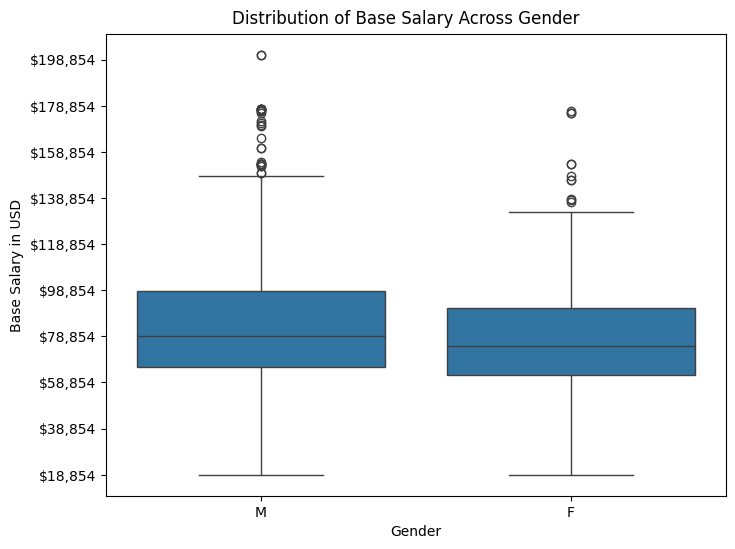

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6)) # Create a figure and an axes.

pl2 = sns.boxplot(x="Gender",
            y="Base Salary", # Use the numeric base salary data
            data=sal,
            ax=ax) # Plot on the created axes

# Adjust the y-axis ticks to be more frequent and set limits
y_min = sal['Base Salary'].min()
y_max = sal['Base Salary'].max()
y_ticks = np.arange(y_min, y_max, 20000) # Ticks every 20000 units from the min value to max value
ax.set_yticks(y_ticks)

#naming
fig.suptitle("Distribution of Base Salary Across Gender",  y=0.92)
pl2.set(xlabel = "Gender", ylabel = "Base Salary in USD")

# Format y-axis ticks with dollar sign and comma
from matplotlib.ticker import StrMethodFormatter
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}')) # Format as currency with no decimal places

plt.show()

- In the above boxplot, the median base salary appears to be very similar for both genders, indicated by the horizontal lines within the boxes at roughly the same level.
- However, the median base salary and quartiles 1 and 2 for male employees is slightly higher, and with a wider spread of data especially around the upper outliers. However the minimum is roughly the same across genders, probably due to minimum wage laws.
- The interquartile range (IQR), represented by the height of the boxes, seems comparable for both genders. This suggests that the middle 50% of base salaries for both groups have a similar spread.
- There appears to be some outliers with higher base salaries in both genders, represented by the individual points above the upper whiskers of the box plots.
- The box plots suggests that the overall distribution of base salaries is quite similar between genders, at least in terms of central tendency and spread.

## Is there a relationship between overtime pay and gender?

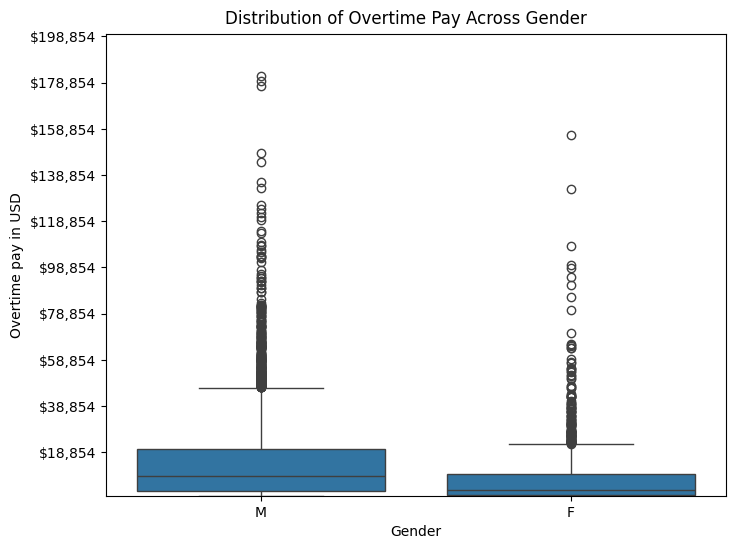

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6)) # Create a figure and an axes.

pl3 = sns.boxplot(x="Gender",
            y="Overtime Pay", # Use the numeric base salary data
            data=sal,
            ax=ax) # Plot on the created axes

# Adjust the y-axis ticks to be more frequent and set limits
y_min = sal['Base Salary'].min()
y_max = sal['Base Salary'].max()
y_ticks = np.arange(y_min, y_max, 20000) # Ticks every 20000 units from the min value to max value
ax.set_yticks(y_ticks)
ax.set_ylim(0, 200000)
#naming
fig.suptitle("Distribution of Overtime Pay Across Gender",  y=0.92)
pl3.set(xlabel = "Gender", ylabel = "Overtime pay in USD")

# Format y-axis ticks with dollar sign and comma
from matplotlib.ticker import StrMethodFormatter
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}')) # Format as currency with no decimal places

plt.show()

- In the following boxplot the median overtime pay for both genders appears to be quite low.This suggests that a large portion of employees, regardless of gender, have relatively low overtime pay.
- The interquartile range (IQR) for overtime pay seems to be wider for males compared to females, suggesting a larger spread in overtime pay among male employees in the middle 50% of the distribution.
- Both genders show a significant number of outliers with very high overtime pay, extending far above the upper whiskers of the box plots. This indicates that there are employees in both groups who earn substantially more in overtime compared to the majority.
- The distribution of overtime pay is heavily skewed towards lower values for both genders, with a long tail extending to higher values due to the outliers.

Overall, the box plot suggests that while the majority of employees have low overtime pay, there's a notable presence of high earners in overtime in both genders, with potentially a larger spread of overtime earnings among males.

# Narrowing Down Departments

Due to large amount of departments that would muddle and crowd visualizations, we decided to consolidate the Department Name column to the top 10 Departments by employee count.

In [ ]:
sal[["Department_Name"]].describe() #original 27 categories

,Department_Name
count,5786
unique,27
top,Department of Police
freq,1395


In [ ]:
top_departments = sal['Department_Name'].value_counts().head(10).index #reduce to top 10

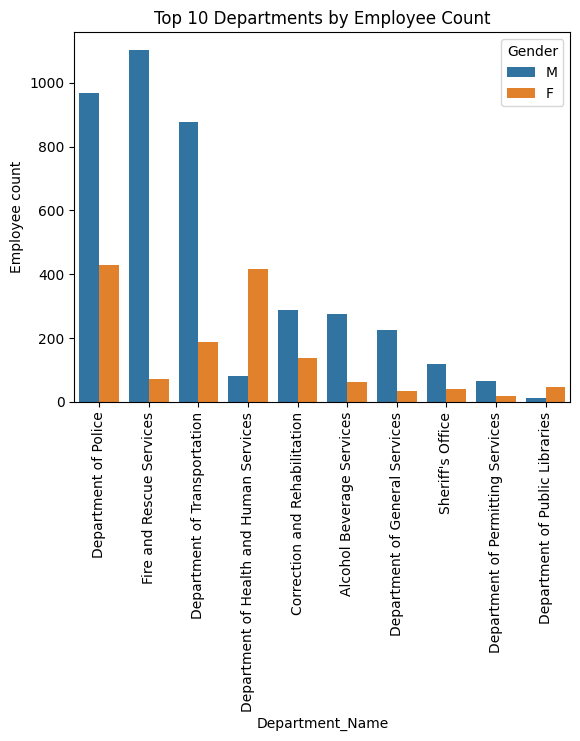

In [ ]:
sns.countplot(data=sal[sal['Department_Name'].isin(top_departments)],
              x='Department_Name',
              hue = 'Gender',
              order=top_departments)
plt.title("Top 10 Departments by Employee Count")
plt.xticks(rotation=90)
plt.ylabel("Employee count")
plt.show()

# Which departments have a higher base salary?

/tmp/ipython-input-2581477317.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=sal, x='Department_Name', y='Base Salary', order = top_departments, palette = "coolwarm")


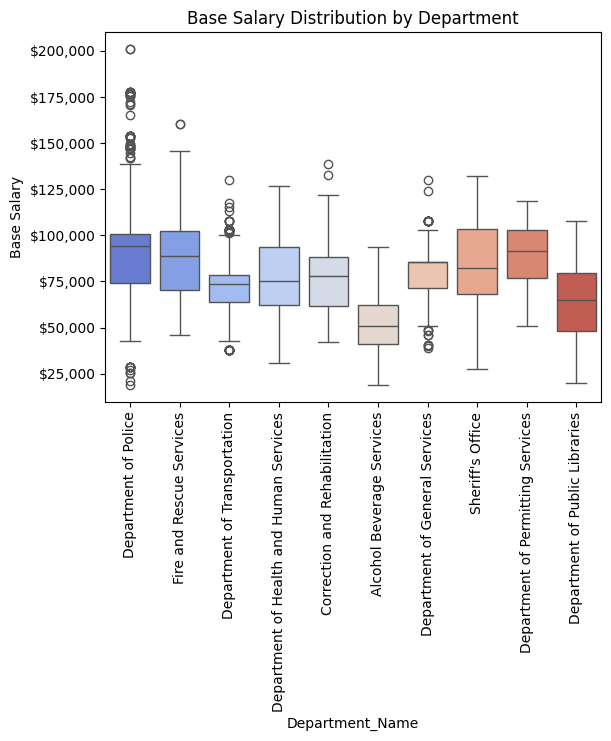

In [ ]:
ax = sns.boxplot(data=sal, x='Department_Name', y='Base Salary', order = top_departments, palette = "coolwarm")

ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
plt.title("Base Salary Distribution by Department")
plt.xticks(rotation=90)
plt.show()

# Which Departments have a higher Overtime Pay?

Here we see the the departments with the highest median salary are the Police Department and Permitting Services. However, considering the whiskers with the top 25% of data and outliers, the Fire and Rescue Services is also a strong contender.

/tmp/ipython-input-622672474.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=sal, x='Department_Name', y='Overtime Pay', order = top_departments, palette = "coolwarm")


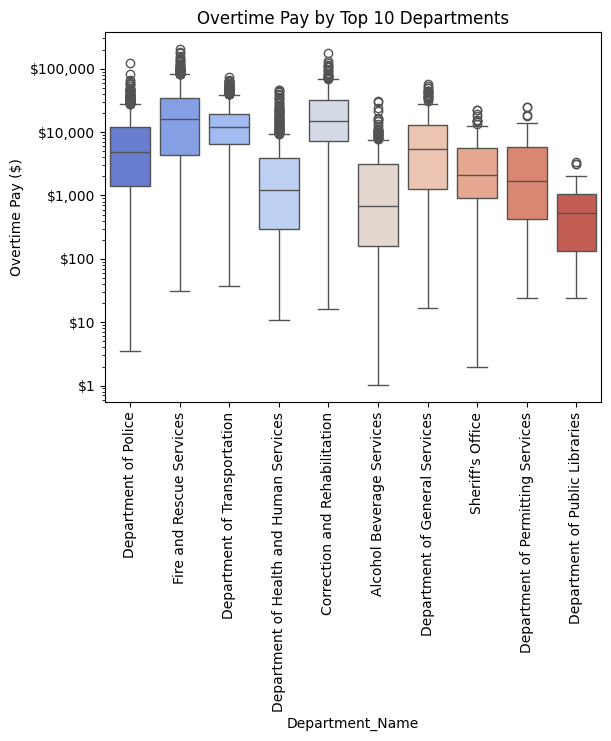

In [ ]:
ax = sns.boxplot(data=sal, x='Department_Name', y='Overtime Pay', order = top_departments, palette = "coolwarm")

ax.set_yscale('log')
plt.title("Overtime Pay by Top 10 Departments")
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
plt.xticks(rotation=90)
plt.ylabel("Overtime Pay ($)")
plt.show()

The above plot shows the highest median overtime pay for the Fire Department, with the Department of Correction and Rehabiliation following closely.

# V. Simulation of a nonparametric inference of the median for the Base Salary

In [ ]:
# 1) Settings
N_BOOT = 10000
CONF_LEVEL = 0.95
RANDOM_SEED = 42
NULL_MEDIAN = None  # e.g., 60000 to run an exact sign test; keep None to skip

In [ ]:
# 2) Bootstrap CI for the median (percentile method)
import numpy as np # Import numpy
import pandas as pd # Import pandas

sal=pd.read_csv('/content/drive/MyDrive/Project 1 Data 201/Employee_salaries.csv')

rng = np.random.default_rng(RANDOM_SEED)

base_sal = sal['Base Salary']

# Clean and convert 'Base Salary' to numeric
base_sal_cleaned = base_sal.str.replace('[$,]', '', regex=True).astype(float)

boot_meds = np.median(rng.choice(base_sal_cleaned, size=(N_BOOT, base_sal_cleaned.size), replace=True), axis=1)

alpha = 1 - CONF_LEVEL
ci_low, ci_high = np.percentile(boot_meds, [100*alpha/2, 100*(1 - alpha/2)])
sample_median = float(np.median(base_sal_cleaned))

print(f"Bootstrap CI for the median: ({ci_low:.2f}, {ci_high:.2f})")
print(f"Sample median: {sample_median:.2f}")

Bootstrap CI for the median: (81770.00, 82484.39)
Sample median: 81770.00


In [ ]:
# Visualing the bootstraping


Using a non-parametric bootstrap procedure with 10,000 resamples, we estimated the median salary and the associated uncertainty. The observed sample median salary is approximately \$81,770, and the 95% bootstrap confidence interval ranges from about \$81,766 to \$82,848. Overall, the bootstrap results provide strong evidence that the true median salary in the underlying population lies within this confidence range.

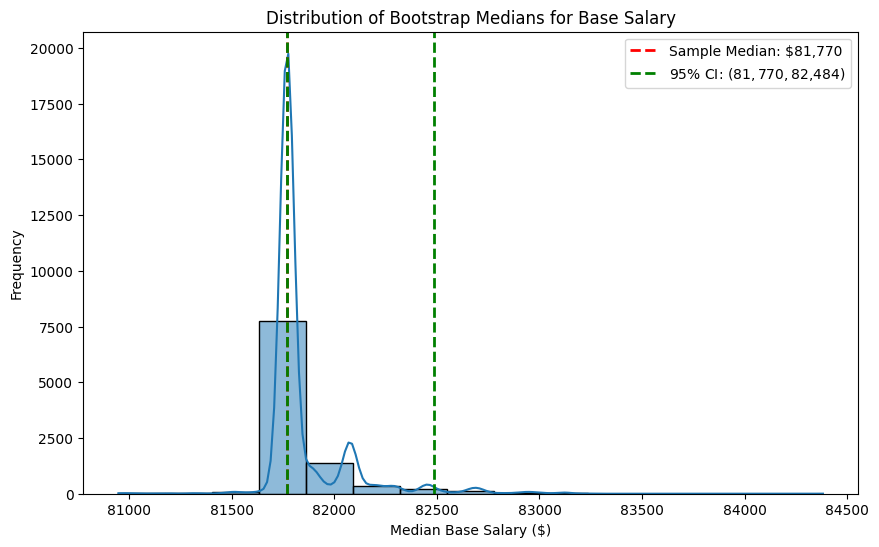

In [ ]:
# Visualization the distribution of bootstrap medians and the confidence interval.

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(boot_meds, kde=True)
plt.axvline(sample_median, color='red', linestyle='dashed', linewidth=2, label=f'Sample Median: ${sample_median:,.0f}')
plt.axvline(ci_low, color='green', linestyle='dashed', linewidth=2, label=f'95% CI: (${ci_low:,.0f}, ${ci_high:,.0f})')
plt.axvline(ci_high, color='green', linestyle='dashed', linewidth=2)
plt.title("Distribution of Bootstrap Medians for Base Salary")
plt.xlabel("Median Base Salary ($)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

The boostrap distribution of the medians base salary visualization is consistent with our interpretation above

# VI. Randomly sample ~10% of rows

In [ ]:
# 1) Settings
FRAC = 0.10            # ~10% of rows
N_BOOT = 10000
CONF_LEVEL = 0.95
RANDOM_SEED = 42
NULL_MEDIAN = None     # e.g., 60000 to run an exact sign test; keep None to skip

In [ ]:
# 2) Bootstrap CI for the median on the sample
rng = np.random.default_rng(RANDOM_SEED)

# 3) Take a random sample of the original base salary data
x_s = base_sal.sample(frac=FRAC, random_state=RANDOM_SEED)

# Clean and convert the sampled 'Base Salary' to numeric
x_s_cleaned = x_s.str.replace('[$,]', '', regex=True).astype(float)

boot_meds_s = np.median(rng.choice(x_s_cleaned, size=(N_BOOT, x_s_cleaned.size), replace=True), axis=1)

alpha = 1 - CONF_LEVEL
ci_low_s, ci_high_s = np.percentile(boot_meds_s, [100*alpha/2, 100*(1 - alpha/2)])
sample_median_s = float(np.median(x_s_cleaned))


print(sample_median_s)
print(f"Bootstrap CI for the median of the sample: ({ci_low_s:.2f}, {ci_high_s:.2f})")

81770.0
Bootstrap CI for the median of the sample: (79303.00, 83684.00)


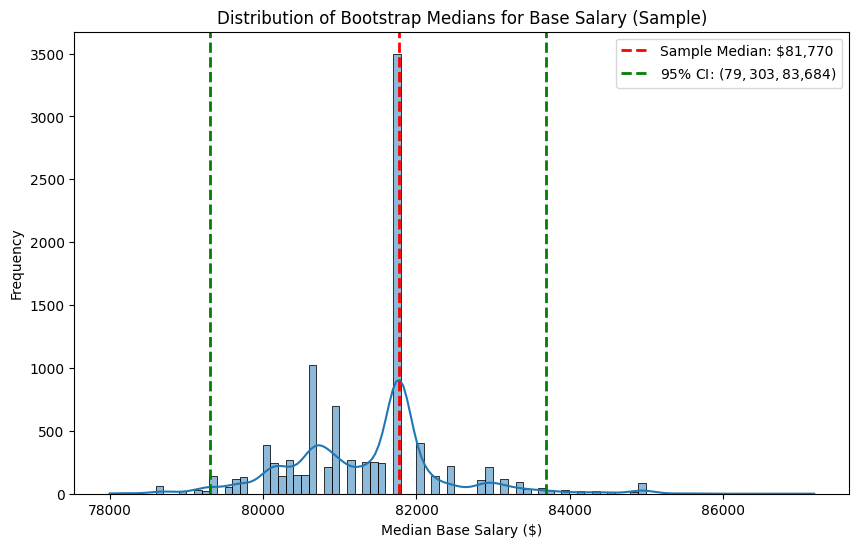

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(boot_meds_s, kde=True)
plt.axvline(sample_median_s, color='red', linestyle='dashed', linewidth=2, label=f'Sample Median: ${sample_median_s:,.0f}')
plt.axvline(ci_low_s, color='green', linestyle='dashed', linewidth=2, label=f'95% CI: (${ci_low_s:,.0f}, ${ci_high_s:,.0f})')
plt.axvline(ci_high_s, color='green', linestyle='dashed', linewidth=2)
plt.title("Distribution of Bootstrap Medians for Base Salary (Sample)")
plt.xlabel("Median Base Salary ($)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

From this visualization of the distribution of bootstrap medians, it appears roughly normal and is centered around the sample median of \$81,770. The 95% confidence interval for the median of the sample is from $79,303 to \$83,684. This range provides an estimate for the true population median based on our sample.

# Conclusion

While these graphs provide a valuable visual representation of the distribution of our data, further statistical analysis is needed to determine if the relationships between certain variables are statistically significant. However, the visualizations help to communicate trends that deserve further research.